<a href="https://colab.research.google.com/github/timomwa/50ForReel/blob/master/Copy_of_ITEC610_AT3_Report_and_PythonCode_StudentNo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Answers for;***

---


### ***UTEC610 Data processing, analysis and visualisation project ***

### Assessment Artefact: Report and Python Code 
Weighing [40%]


---


# *** Instructions ***
Run One qiestion after the other;


1.   [Question 1](https://colab.research.google.com/drive/1vHKY60Z8wSqvBxghIXzgGeOD_RsU3kHt#scrollTo=_5ELvo4KIbDo)
  > [Cell 1](https://colab.research.google.com/drive/1vHKY60Z8wSqvBxghIXzgGeOD_RsU3kHt#scrollTo=_5ELvo4KIbDo)

  > [Cell 2](https://colab.research.google.com/drive/1vHKY60Z8wSqvBxghIXzgGeOD_RsU3kHt#scrollTo=31r8_ioYiwpC&line=4&uniqifier=1)


2.   Question 2




# Task 1 (10 marks)
Produce a summary statistics graph on current_weight,weight_a_year_ago, and height.
[Hint: similar to figure 1 below]
Make sure you run the code in the cells in order.

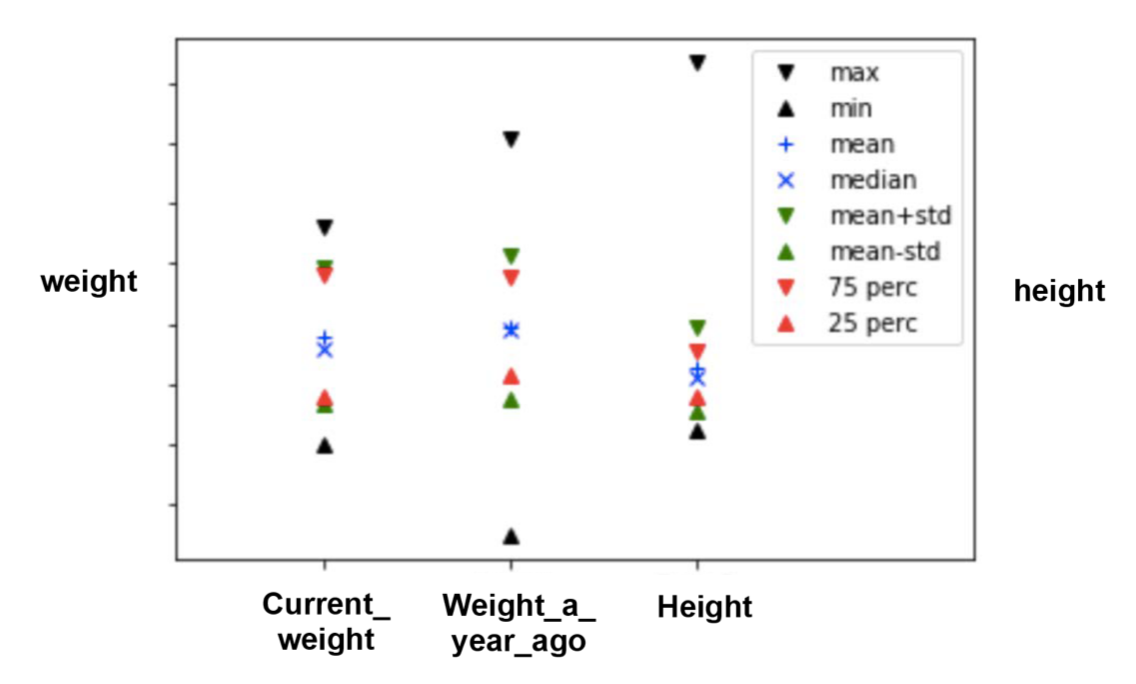

In [ ]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd
import numpy as np
import io

data_ = files.upload()

Saving brfss.csv to brfss.csv


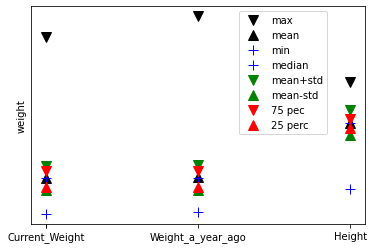

In [ ]:
import matplotlib.pyplot
df = pd.read_csv(io.StringIO(data_['brfss.csv'].decode('utf-8')))
cur_weight_summary = df['wtkg2'].describe()
prev_weight_summary = df['wtyrago'].describe()
height_summary = df['htm3'].describe()

#Build np arrays from each set
max_points = np.array( [cur_weight_summary['max'], prev_weight_summary['max'],height_summary['max'] ] )
mean_points = np.array( [cur_weight_summary['mean'], prev_weight_summary['mean'],height_summary['mean'] ] )
min_points = np.array( [cur_weight_summary['min'], prev_weight_summary['min'],height_summary['min'] ] )
median_points = np.array( [cur_weight_summary.median(), prev_weight_summary.median(),height_summary.median() ] )
median_plus_stdDev_points = np.array( [(cur_weight_summary['mean']+cur_weight_summary['std'])
                                       , (prev_weight_summary['mean']+prev_weight_summary['std'])
                                       , (height_summary['mean']+prev_weight_summary['std']) ] )
median_less_stdDev_points = np.array( [(cur_weight_summary['mean']-cur_weight_summary['std'])
                                       , (prev_weight_summary['mean']-prev_weight_summary['std'])
                                       , (height_summary['mean']-prev_weight_summary['std']) ] )
percentile_75 = np.array( [cur_weight_summary['75%'], prev_weight_summary['75%'],height_summary['75%'] ] )
percentile_25 = np.array( [cur_weight_summary['25%'], prev_weight_summary['25%'],height_summary['25%'] ] )


fig, ax = plt.subplots()
#Plot the graph
plt.plot(max_points,'o', marker = 'v', mec = 'k', ms = 10,  mfc = 'k', label="max")
plt.plot(mean_points,'o', marker = '^', mec = 'k', ms = 10,  mfc = 'k',label="mean")
plt.plot(min_points,'o', marker = '+', mec = 'b', ms = 10,  mfc = 'b', label="min")
plt.plot(median_points,'o', marker = '+', mec = 'b', ms = 10,  mfc = 'b', label="median")
plt.plot(median_plus_stdDev_points,'o', marker = 'v', mec = 'g', ms = 10,  mfc = 'g', label="mean+std")
plt.plot(median_less_stdDev_points,'o', marker = '^', mec = 'g', ms = 10,  mfc = 'g', label="mean-std")
plt.plot(percentile_75,'o', marker = 'v', mec = 'r', ms = 10,  mfc = 'r', label="75 pec")
plt.plot(percentile_25,'o', marker = '^', mec = 'r', ms = 10,  mfc = 'r', label="25 perc")

#Y label is 'weight'
ax.set_ylabel('weight', rotation=90)
#Position legend as required
leg = ax.legend(loc='upper right', bbox_to_anchor=(0.4, 0.5, 0.5, 0.5))

#Remove the visible ticks, so we're left with
#sring ticks
ax.set_xticks([])
ax.set_yticks([])


#Set the 
plt.xticks(ticks=[0,1,2,0], labels=['Current_Weight','Weight_a_year_ago', 'Height',''])

plt.show()

# Task 2 ( 10 marks )



Define weght_change = (current_weight - weight_a_year_ago). Calculate correlation between weight_change and the following variables, and determine which one is most correlated (regardless of sign of corelation) with weight_change. Use scatter plots to support your conclution.

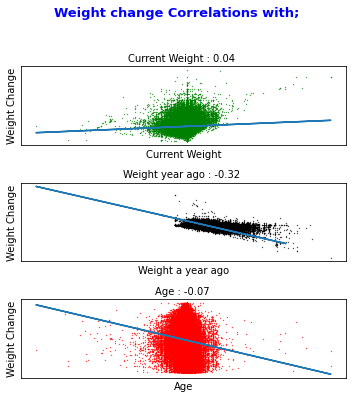

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv(io.StringIO(data_['brfss.csv'].decode('utf-8')))

# Some data sanitization, avoid Nans so we plot the line
# Without this cleanup, plotline will not draw
df = df.replace([np.nan,'?','n.a.', r'^\s*$'], 0, inplace = False)
df = df.drop(df[df.wtkg2 < 1].index)
df = df.drop(df[df.wtyrago < 1].index)
df = df.drop(df[df.age < 1].index)

#Derive individual data sets 
current_weight = df['wtkg2']
weight_a_year_ago = df['wtyrago']
age = df['age']
#Compute the difference 
weight_change = current_weight - weight_a_year_ago
#Compute correlation
weight_change_corr_with_cur_weight =  round(weight_change.corr( current_weight ), 2)


fig, ax = plt.subplots()
# make the subplots bigger than default
fig.set_figheight(5)
fig.set_figwidth(5)

#Scatter Plot 1 - Correlation between weight change
#                 and current weight

# Derive our ticker values
weight_change_corr_with_curr_weight =  round(weight_change.corr( current_weight ),2)
x = np.array( weight_change )
y0 = np.array( current_weight )
# Arguements supplied in tuple (1, 1, 1)
# 1 - has two rows 
# 2 - has two columns
# 1 - this is the first plot
ax0 = fig.add_subplot(3, 1, 1)
ax0.scatter(x,y0,s = 0.1, marker = 'o',color = 'green')
ax0.set_title("Weight Change Vs Current Weight")
ax0.set_title(label=("Current Weight : %a "% (weight_change_corr_with_curr_weight) ),
          fontsize=10,
          color="black",pad='5.0')
ax0.set_ylabel(ylabel='Weight Change')
ax0.set_yticks([])
ax0.set_xlabel(xlabel='Current Weight')
ax0.set_xticks([])
# find line of best fit
a, b = np.polyfit(x,y0,1)
ax0.plot(x, a*x+b)# Plot correlation line in graph




# Plot 2: Weight Change Vs Weight a year ago
# Derive correlation
weight_change_corr_with_weight_year_ago =  round(weight_change.corr( weight_a_year_ago ),2)

# Derive the ticker values for plot 2
y1 =  np.array( weight_a_year_ago )
# Arguements supplied in tuple (1, 1, 2)
# 2 - has two rows 
# 1 - has two columns
# 2 - this is the second plot
ax1 = fig.add_subplot(3, 1, 2)
ax1.scatter(y1,x,s = 0.1, marker = 'o',color = 'black')
ax1.set_title(label=("Weight year ago : %a "% (weight_change_corr_with_weight_year_ago) ),
          fontsize=10,
          color="black",pad='5.0')
ax1.set_ylabel(ylabel='Weight Change')
ax1.set_yticks([])
ax1.set_xlabel(xlabel='Weight a year ago')
ax1.set_xticks([])
# find line of best fit
a, b = np.polyfit(x,y1, 1)
ax1.plot(x, a*x+b)# Plot correlation line in graph




# Plot 3: Weight Change Vs Weight a year ago
#Derive correlation
weight_change_corr_with_age =  round(weight_change.corr( age ),2)
# Derive the ticker values for plot 3
y3 =  np.array( age )
# Arguements supplied in tuple (1, 1, 3)
# 2 - has two rows 
# 2 - has two columns
# 3 - this is the third plot
ax2 = plt.subplot(3,1,3)
ax2.scatter(x,y3,s = 0.1, marker = 'o',color = 'red')
ax2.set_title(label=("Age : %a "% (weight_change_corr_with_age) ),
          fontsize=10,
          color="black",pad='5.0')
ax2.set_ylabel(ylabel='Weight Change')
ax2.set_yticks([])
ax2.set_xlabel(xlabel='Age')
ax2.set_xticks([])
# find line of best fit
a, b = np.polyfit(x,y3, 1)
ax2.plot(x, a*x+b)# Plot correlation line in graph

'''
plt.subplots_adjust(left=0.2,
                    bottom=0.1, 
                    right=0.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
                    '''
#Set appropriate super title
plt.suptitle("Weight change Correlations with;",size=13, y=1.1, fontweight='bold', color='blue')
#Apply tight layout
plt.tight_layout()

plt.show()
plt.close('all')

Both **Weight a year ago** and **age** have strong (albeit negative) correlation to the individual's **current weight**. With **Weight a year ago** having the stronget correlation with it's value closest to unsigned 1, i.e -0.32

# Task 3 ( 5 marks )

Use *t-test* to check significant difference;

# Task 3.1 ( 1 mark )

Use u-test to test whether there is a significant difference between the **weight_change** of male and female.

In [ ]:
from scipy.stats import mannwhitneyu
df = pd.read_csv(io.StringIO(data_['brfss.csv'].decode('utf-8')))
# Some data sanitization, avoid Nans so we plot the line
# Without this cleanup, plotline will not draw
df = df.replace([np.nan,'?','n.a.', r'^\s*$'], 0, inplace = False)
df = df.drop(df[df.wtkg2 < 1].index)
df = df.drop(df[df.wtyrago < 1].index)
df = df.drop(df[df.age < 1].index)

females_subset = df.query("sex == 1", inplace=False)
males_subset = df.query("sex == 2", inplace=False)

females_current_weight = females_subset['wtkg2']
females_weight_a_year_ago = females_subset['wtyrago']

males_current_weight = males_subset['wtkg2']
males_weight_a_year_ago = males_subset['wtyrago']

female_diff = females_current_weight - females_weight_a_year_ago
male_diff = males_current_weight - males_weight_a_year_ago

mannwhitneyu(  female_diff.values,  male_diff.values)


MannwhitneyuResult(statistic=17461784252.5, pvalue=7.272211862849254e-38)

With a p-value less than 0.05, i.e 7.272211862849254e-38, there's a significance difference in male and female weight differences.

# Task 3.2 ( 1 mark )

Randomly split the subjects into two groups of roughly equal sizes, and use t-test to test whether ther is a significant difference between the weight_change of the two groups.

In [ ]:
from scipy.stats import mannwhitneyu
import numpy as np
df = pd.read_csv(io.StringIO(data_['brfss.csv'].decode('utf-8')))
# Some data sanitization, avoid Nans so we plot the line
# Without this cleanup, plotline will not draw
df = df.replace([np.nan,'?','n.a.', r'^\s*$'], 0, inplace = False)
df = df.drop(df[df.wtkg2 < 1].index)
df = df.drop(df[df.wtyrago < 1].index)
df = df.drop(df[df.age < 1].index)

#Split into two random groups

# Group 1
df_1 = df.sample(n=10000, replace=True) 
df_2 = df.sample(n=11020, replace=True)

# Group 1 Weight difference
grp_1_current_weight = df_1['wtkg2']
grp_1_weight_a_year_ago = df_1['wtyrago']
grp_1_weight_change = grp_1_current_weight - grp_1_weight_a_year_ago

# Group 2 Weight differences
grp_2_current_weight = df_2['wtkg2']
grp_2_weight_a_year_ago = df_2['wtyrago']
grp_2_weight_change = grp_2_current_weight - grp_2_weight_a_year_ago

uTestResult = mannwhitneyu(grp_1_weight_change.values, grp_2_weight_change.values)
print(male_vs_female)

MannwhitneyuResult(statistic=53759085.5, pvalue=0.001133422825098379)


With p values less than 0.05 for most results there's a significant difference between two random groups.

# Task 3.3 ( 1 mark )

Repeat the process in 3.2 1000 times and plot the distributions of the -log10(p-value) of the test results.

\[Hint: the x-axis is the number of experiments from 1 to 1000, and the y-axis is log10(p-value). There should be two disttributions: One for each group. Use seaborn.displot method.\]

What can you say about the difference between male in terms of their weight_change?

Consider both the p-value and the absolute differences between the two means.



In [ ]:
from scipy.stats import mannwhitneyu
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *

df = pd.read_csv(io.StringIO(data_['brfss.csv'].decode('utf-8')))
# Some data sanitization, avoid Nans so we plot the line
# Without this cleanup, plotline will not draw
df = df.replace([np.nan,'?','n.a.', r'^\s*$'], 0, inplace = False)
df = df.drop(df[df.wtkg2 < 1].index)
df = df.drop(df[df.wtyrago < 1].index)
df = df.drop(df[df.age < 1].index)

pvalue_grp_1 = np.array([])
pvalue_grp_2 = np.array([])
x_axis = np.array([])
male_df = df.query("sex == 1", inplace=False)
female_df = df.query("sex == 2", inplace=False)
for x in range(1000):
  x_axis = np.append(x_axis, x)

  # Group 1
  df_1_male = male_df.sample(n=10000, replace=True) 
  df_1_female = female_df.sample(n=10000, replace=True) 
  
  #Group 2
  df_2_male = male_df.sample(n=11020, replace=True)
  df_2_female = female_df.sample(n=11020, replace=True)

  # Group 1 Weight difference
  grp_1_current_weight_male = df_1_male['wtkg2']
  grp_1_weight_a_year_ago_male = df_1_male['wtyrago']
  grp_1_weight_change_male = grp_1_current_weight_male - grp_1_weight_a_year_ago_male

  grp_1_current_weight_female = df_1_female['wtkg2']
  grp_1_weight_a_year_ago_female = df_1_female['wtyrago']
  grp_1_weight_change_female = grp_1_current_weight_female - grp_1_weight_a_year_ago_female

  # Group 2 Weight differences
  grp_2_current_weight_male = df_2_male['wtkg2']
  grp_2_weight_a_year_ago_male = df_2_male['wtyrago']
  grp_2_weight_change_male = grp_2_current_weight_male - grp_2_weight_a_year_ago_male

  grp_2_current_weight_female = df_2_female['wtkg2']
  grp_2_weight_a_year_ago_female = df_2_female['wtyrago']
  grp_2_weight_change_female = grp_2_current_weight_female - grp_2_weight_a_year_ago_female

  utest_result_1 = mannwhitneyu(grp_1_weight_change_male.values, grp_2_weight_change_male.values)
  utest_result_2 = mannwhitneyu(grp_1_weight_change_female.values, grp_2_weight_change_female.values)


  log10_pvalue_1 = math.log10(utest_result_1.pvalue) 
  log10_pvalue_1 = abs(log10_pvalue_1)
  pvalue_grp_1 = np.append(pvalue_grp_1, log10_pvalue_1)

  log10_pvalue_2 = math.log10(utest_result_2.pvalue) 
  log10_pvalue_2 = abs(log10_pvalue_2)
  pvalue_grp_2 = np.append(pvalue_grp_2, log10_pvalue_2)


#print(pvalue_grp_1)
#print(pvalue_grp_2)
#print(x_axis)


#sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
subplot(2,2,1)
ax = sns.distplot(pvalue_grp_1)
#ax.set_xticks(x_axis)

subplot(2,2,2)
ax2 = sns.distplot(pvalue_grp_2)
#ax2.set_xticks(x_axis)
plt.show()